# Part 1: Regression
## 1. Preprocessing

## 1.1. Download Dataset

In [195]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [196]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

# Check if there are any missing values in the dataset
print("\nNumber of missing values in X:", X.isnull().sum().sum())
print("Number of missing values in y:", y.isnull().sum())

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

## 1.2. Understanding Data

### 1.2.1. Features Data 

#### Categorical data

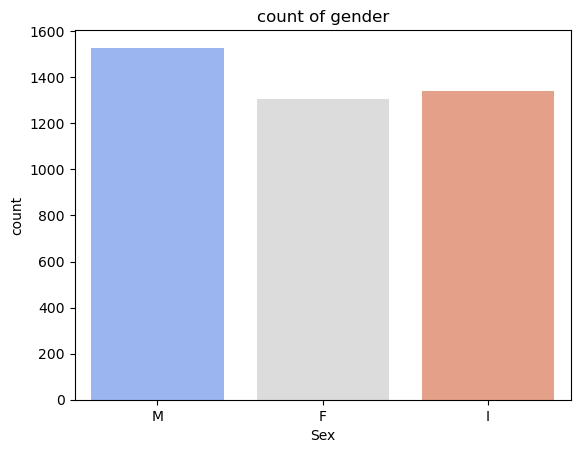

In [197]:
sns.countplot(x = 'Sex', data = X, palette="coolwarm")
plt.title('count of gender')
plt.show()

#### Numerical data

In [198]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [199]:
X.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


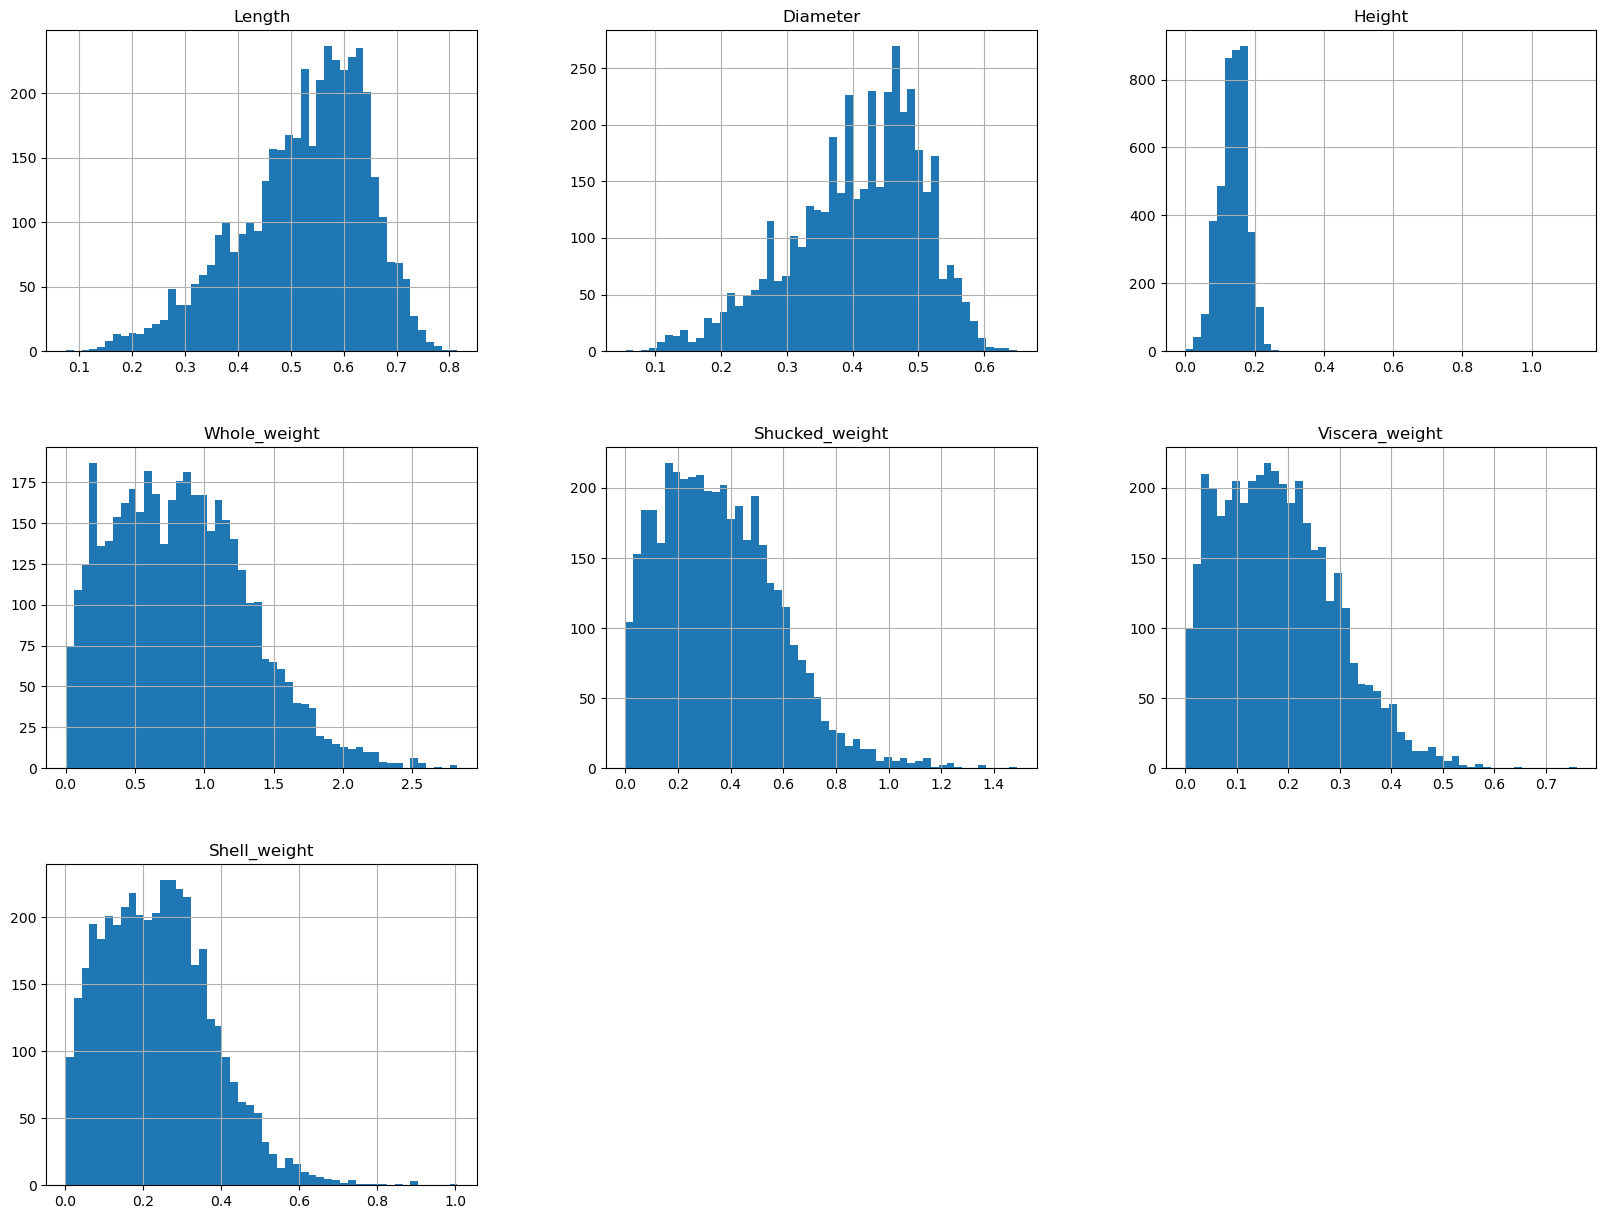

In [200]:
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(20,15))
plt.show()

### 1.2.2. Target Data 

In [201]:
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


In [202]:
y.describe()

,Rings
count,4177.000000
mean,9.933684
std,3.224169
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


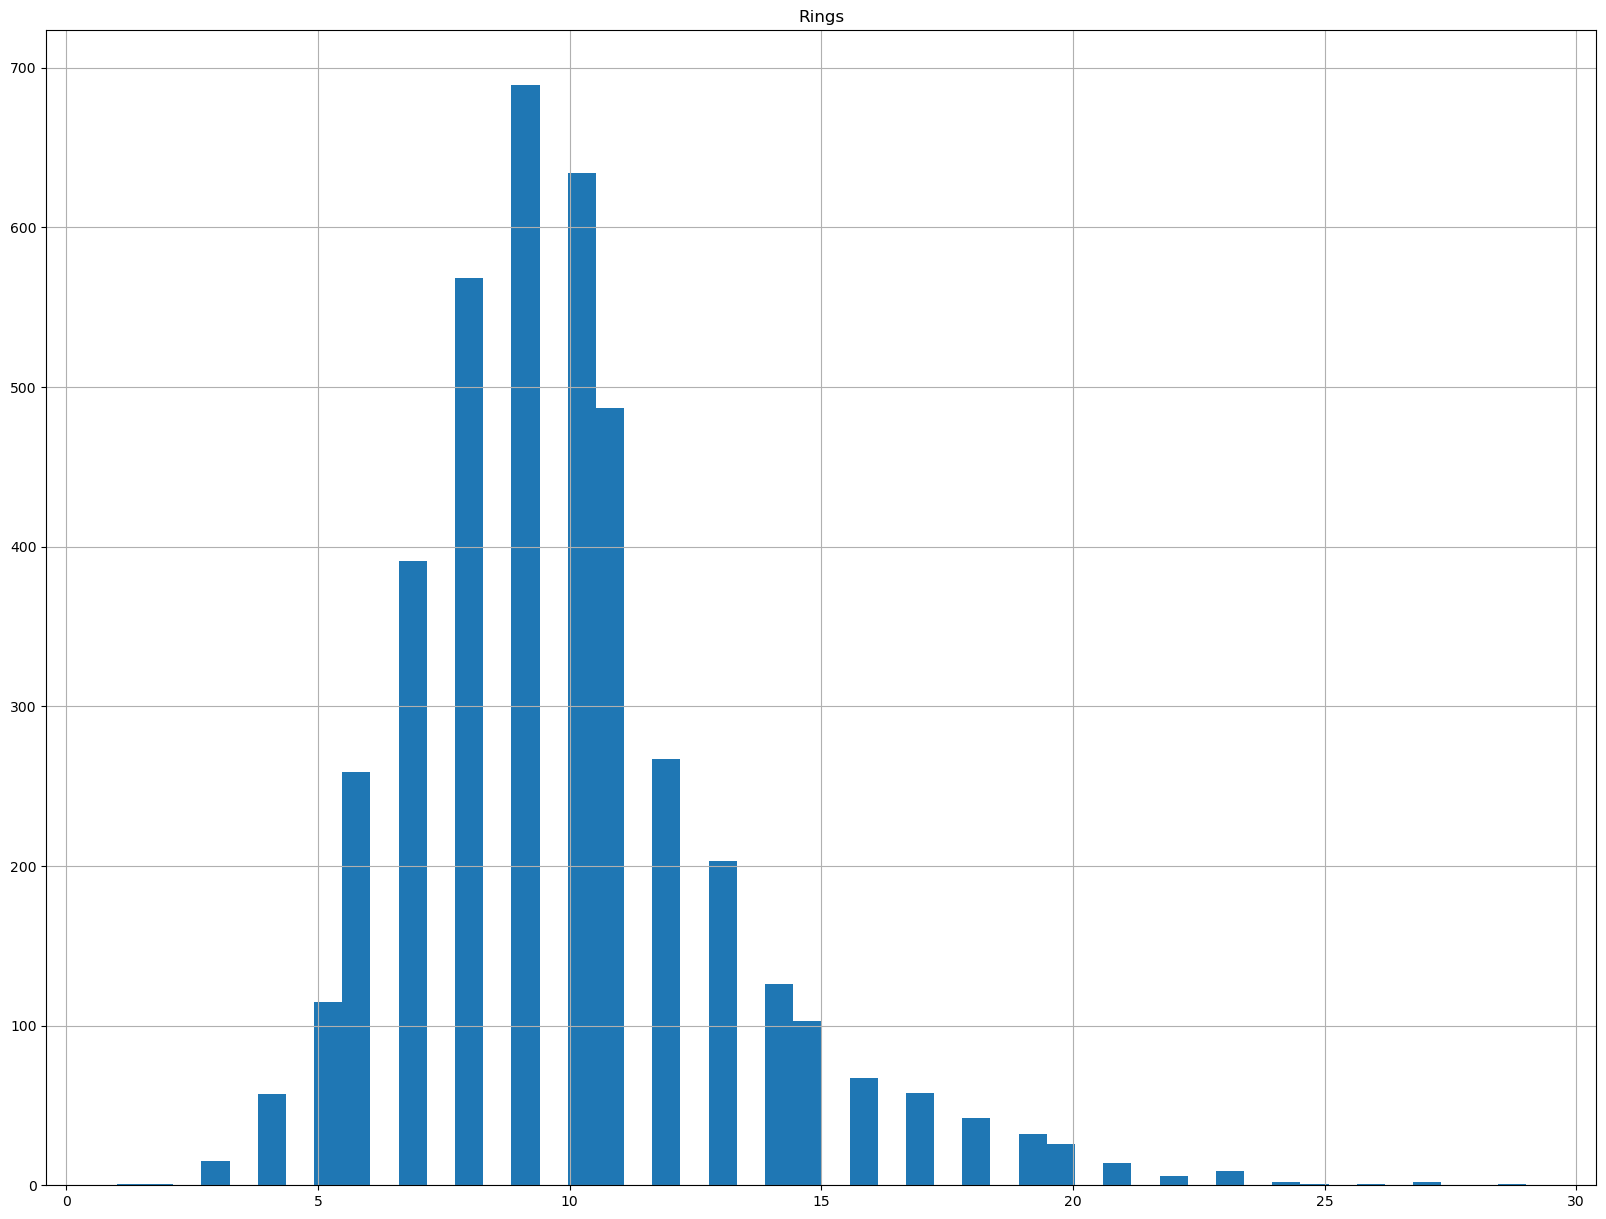

In [203]:
import matplotlib.pyplot as plt
y.hist(bins=50, figsize=(20,15))
plt.show()

### 1.2.3. Correlation of Data

#### 1. Hitmap of Total Data

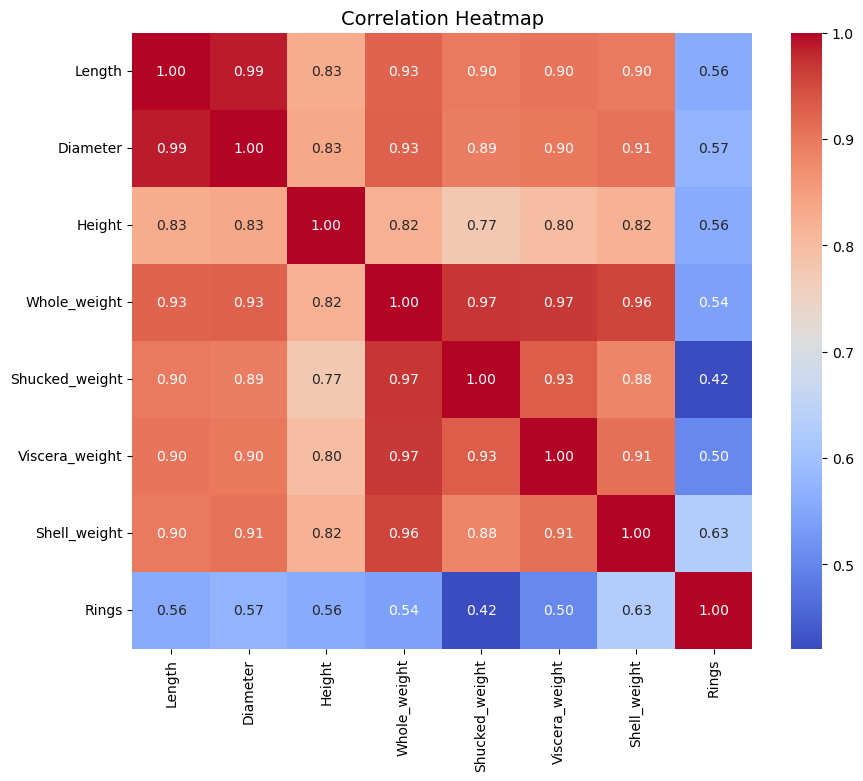

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt


## combine features and targets data
total_data = pd.concat([X, y], axis=1)

# 상관 행렬 계산
corr_matrix = total_data.corr(numeric_only=True)

# heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


#### 2. Target & Features

In [205]:
# Targets와 Features 간의 상관관계 추출
target_feature_corr = corr_matrix.iloc[:-1, -1]

# 내림차순으로 정렬
target_feature_corr_sorted = target_feature_corr.sort_values(ascending=False)

# 출력
print("Targets와 Features 간의 상관관계:")
print(target_feature_corr_sorted)

Targets와 Features 간의 상관관계:
Shell_weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole_weight      0.540390
Viscera_weight    0.503819
Shucked_weight    0.420884
Name: Rings, dtype: float64


## 1.3. Preprocessing

### 1.3.1. Encoding Non-Numerical Data

In [206]:
# Place same weight on each Sex
oh_X = pd.get_dummies(X, columns=['Sex'])
print(oh_X.head())

   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150      0      0      1  
1         0.070      0      0      1  
2         0.210      1      0      0  
3         0.155      0      0      1  
4         0.055      0      1      0  


### 1.3.2. Removing Data

#### 1. Outlier

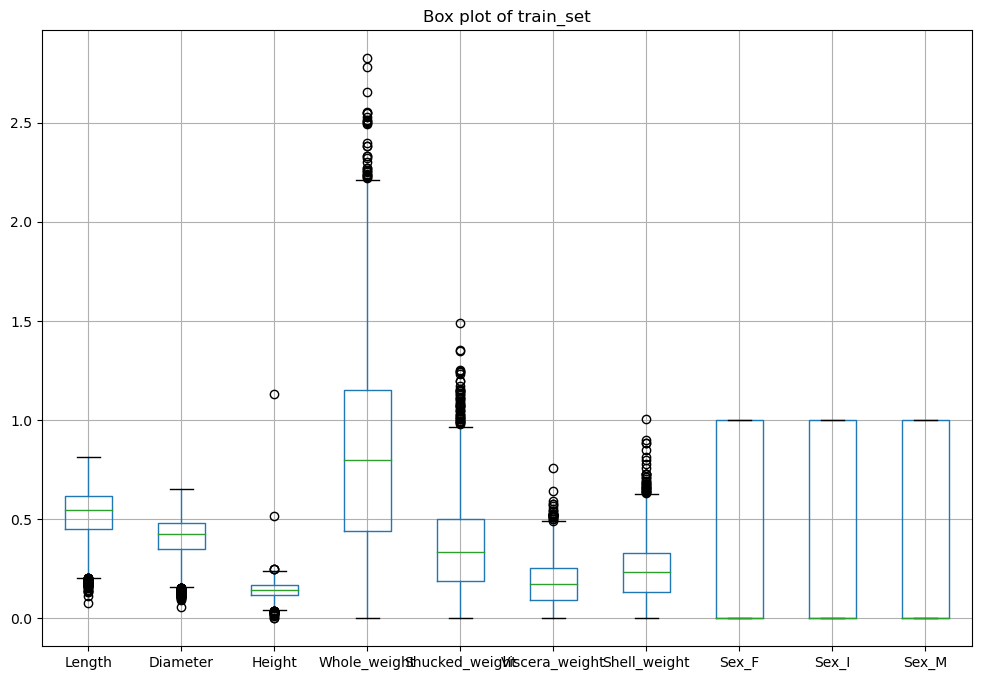

In [207]:
import matplotlib.pyplot as plt

# train_set의 각 열에 대한 박스 플롯 그리기
plt.figure(figsize=(12, 8))
oh_X.boxplot()
plt.title('Box plot of train_set')
plt.show()

In [212]:
def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 1  # 제거 범위 조절 변수
        dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) & (dff[k] >= level_1q - (rev_range * IQR))]
        dff = dff.reset_index(drop=True)
    return dff

cleaned_feature_data=remove_out(oh_X, ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'])

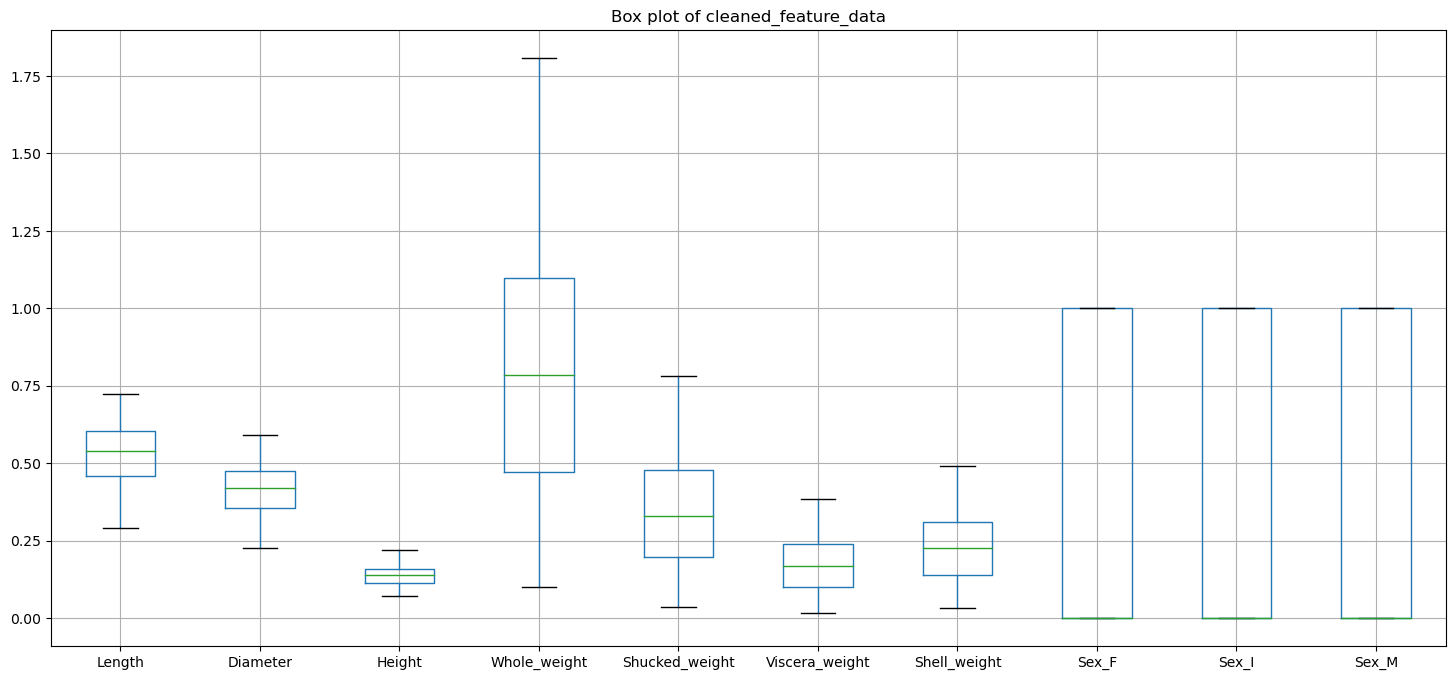

In [214]:
# 이상치를 제거한 후 boxplot 그리기
plt.figure(figsize=(18, 8))
cleaned_feature_data.boxplot()
plt.title('Box plot of cleaned_feature_data')
plt.show()

#### 2. "Total Weight < (Abalone Weight + Shell Weight)"


In [215]:
# X[X["Whole_weight"] < X["Shucked_weight"] + X["Shell_weight"]]

In [216]:
X = X[X["Whole_weight"] >= X["Shucked_weight"] + X["Shell_weight"]]

#### 3. "Abalone Weight < Interior Weight"

In [217]:
X[X["Shucked_weight"] < X["Viscera_weight"]]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
323,I,0.265,0.205,0.070,0.1055,0.039,0.0410,0.0350
2114,I,0.130,0.095,0.035,0.0105,0.005,0.0065,0.0035
2240,M,0.415,0.315,0.125,0.3880,0.068,0.0900,0.1250


In [218]:
X=X[X["Shucked_weight"] >= X["Viscera_weight"]]

### 1.3.4. Data Normalization

In [259]:
from sklearn.preprocessing import MinMaxScaler

# Copy dataframe of original data
mM_X = oh_X.copy()

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 적용
mM_X_scaled = scaler.fit_transform(mM_X)

# mM_X를 DataFrame으로 변환
mM_X_df = pd.DataFrame(mM_X_scaled, columns=mM_X.columns)

print(mM_X_df)

        Length  Diameter    Height  Whole_weight  Shucked_weight  \
0     0.513514  0.521008  0.084071      0.181335        0.150303   
1     0.371622  0.352941  0.079646      0.079157        0.066241   
2     0.614865  0.613445  0.119469      0.239065        0.171822   
3     0.493243  0.521008  0.110619      0.182044        0.144250   
4     0.344595  0.336134  0.070796      0.071897        0.059516   
...        ...       ...       ...           ...             ...   
4172  0.662162  0.663866  0.146018      0.313441        0.248151   
4173  0.695946  0.647059  0.119469      0.341420        0.294553   
4174  0.709459  0.705882  0.181416      0.415796        0.352724   
4175  0.743243  0.722689  0.132743      0.386931        0.356422   
4176  0.858108  0.840336  0.172566      0.689393        0.635171   

      Viscera_weight  Shell_weight  Sex_F  Sex_I  Sex_M  
0           0.132324      0.147982    0.0    0.0    1.0  
1           0.063199      0.068261    0.0    0.0    1.0  
2        

## 1.5. Train-Test Split

In [220]:
# test_size=0.2, random_state=24
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mM_X_df, y, test_size=0.2, random_state=24)

## 1.6. Learning Model: Ensemble(RandomForest + GradientBoosting)

In [256]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import VotingRegressor
import numpy as np

# 개별 모델 초기화
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=50, random_state=42)

# 앙상블 모델 초기화
ensemble_model = VotingRegressor([('RandomForest', rf_model), ('GradientBoosting', gb_model)])

# 앙상블 모델 학습
ensemble_model.fit(X_train, y_train.values.ravel())

# 앙상블 모델 예측
y_pred = ensemble_model.predict(X_test)

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과 출력
print("앙상블 모델 결과:")
print("MAE:", mae)
print("RMSE:", rmse)

앙상블 모델 결과:
MAE: 1.5053979037509384
RMSE: 2.133168007407893


## 2. Checking Overfitting

### Learning Curve

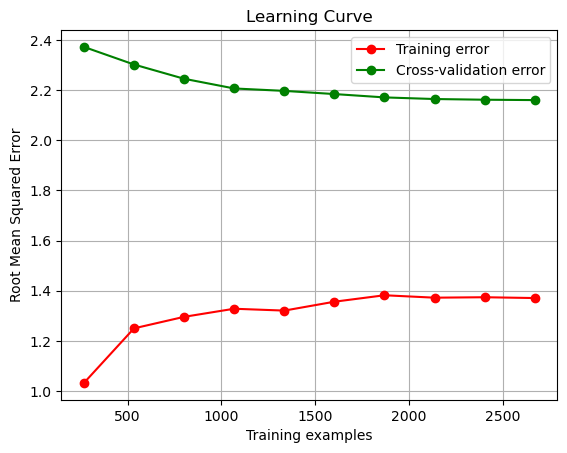

X_train's size 3341


In [261]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Root Mean Squared Error")
    plt.grid()
    
    plt.plot(train_sizes, np.sqrt(train_scores_mean), 'o-', color="r", label="Training error")
    plt.plot(train_sizes, np.sqrt(test_scores_mean), 'o-', color="g", label="Cross-validation error")
    
    plt.legend(loc="best")
    plt.show()

# 모델과 데이터를 이용하여 학습 곡선 그리기
plot_learning_curve(ensemble_model, X_train, y_train.values.ravel(), cv=5)
print("X_train's size: ", X_train.shape[0])